In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset -> data matrix

In [2]:
# n = 5
# m = 2
# data = np.random.rand(n, m)
# data

mean = [3, 4]
AAT = [[1,3],[3,12]]
size = (3000)
data = np.random.default_rng().multivariate_normal(mean, AAT, size=size)

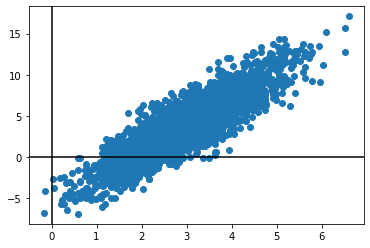

In [3]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])

## Preprocessing

In [4]:
# Shift coordinate -> Normalize 
mean = data.mean(axis = 0)
data = data - mean
data

array([[-0.55647794, -1.85904148],
       [ 0.62466499,  1.35066426],
       [-0.04183227,  0.54614787],
       ...,
       [ 0.5490244 ,  0.14691951],
       [-0.26784639, -1.5120296 ],
       [ 1.14408778,  4.89755945]])

In [5]:
#norm_data = data / (data ** 2).sum(axis = 1).reshape((-1, 1))
#plt.scatter(x = norm_data[:, 0], y = norm_data[:, 1])
#data = norm_data

[-3.56226160e-15 -4.86425715e-16]


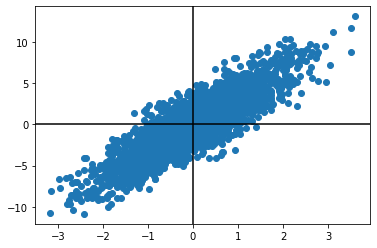

In [6]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
print(data.mean(axis=  0))

## Calculate the SVD:
$$
A * A^T = U \Sigma V^T V \Sigma^T U^T = U * \Sigma * \Sigma^T * U^T
$$
$$
A^T * A = V \Sigma^T U^T * U \Sigma V^T = V \Sigma^T * \Sigma * V^T
$$

Thus: Eigenvalues of $A^T * A$ are $\sigma^2$, the eigen vectors are the columns of V

In [7]:
# Calculate the SVD
u, sigma, v = np.linalg.svd(data, full_matrices=False)
print(u.shape)
#sigma = np.diag(sigma)
print(sigma.shape)
print(v.shape)
#u, sigma, v

(3000, 2)
(2,)
(2, 2)


# Principal components

In [8]:
# Each column of V is an eigenvector  of A.T @ A
print("Eigen values, " ,sigma ** 2)
print("Eigen vectors (rows)", v.T)

Eigen values,  [38177.33744451   671.53486436]
Eigen vectors (rows) [[ 0.24753821 -0.96887813]
 [ 0.96887813  0.24753821]]


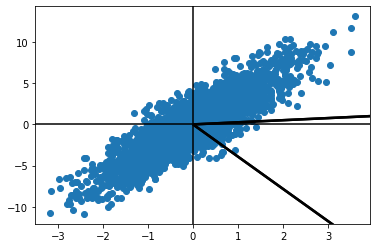

In [9]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)

In [10]:
def scatter_with_axes(data):
    plt.axhline(color='black')
    plt.axvline(color='black')
    plt.scatter(x = data[:, 0], y = data[:, 1])

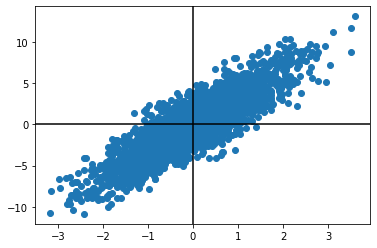

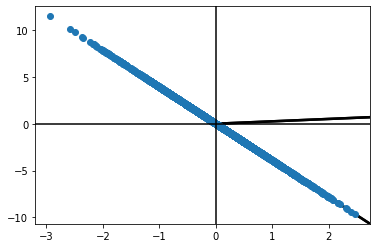

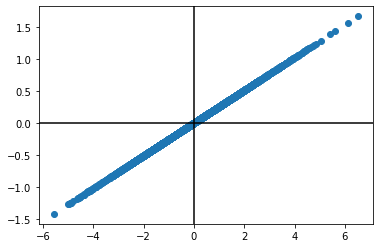

In [11]:
# sub is a vector
def project(x,sub):
    tmp = sub.reshape((-1))
    return (x @ sub / tmp.dot(tmp)) * tmp
    

k = 1
u = v[:, 0:1]
u2 = v[:, 1:2]

x = project(data, u)
x1 = project(data, u2)

scatter_with_axes(data)


plt.figure()
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)
scatter_with_axes(x)

plt.figure()
scatter_with_axes(x1)


In [12]:
u = v.T

In [13]:
v

array([[ 0.24753821,  0.96887813],
       [-0.96887813,  0.24753821]])

In [14]:
M = 3000
data.shape

(3000, 2)

In [15]:
u.T.shape

(2, 2)

In [16]:
data @ u.T 

array([[ 1.66343509, -0.99934311],
       [-1.15400061,  0.93956526],
       [-0.53950582,  0.09466209],
       ...,
       [-0.00644258,  0.56830592],
       [ 1.3986702 , -0.63379561],
       [-4.46193282,  2.32081472]])

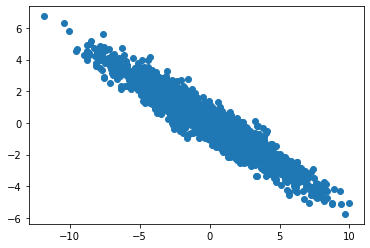

In [17]:
## New coordinate
new = data @ u.T
plt.scatter(x=new[:, 0], y=new[:, 1])

#for a in v.T:
#    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy')

In [18]:
# Pick k: (k = 1)

tu = u[:1]
new = data @ tu.T


Threshold > 0.9 or 0.95

In [19]:
sigma, v.T

(array([195.3902184 ,  25.91398974]),
 array([[ 0.24753821, -0.96887813],
        [ 0.96887813,  0.24753821]]))

In [20]:
threshold = 0.9 * np.sum(sigma)

threshold

199.17378732362477